# Stitching images using translation only
Leanne Friedrich 5/22/21

## initialization

In [19]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
import cv2
import sys
sys.path.append("../")
import py.stitching as st
from py.config import cfg
import py.logs as logs
import py.stitchBas as sb
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
LOGGERDEFINED = logs.openLog('stitching.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# identify missing files

In [3]:
df = sb.countFiles(os.path.join(cfg.path.server, 'singleLines'), stills=False, stitches=True)

INFO: No missing files


# stitch all images in the folder

In [76]:
folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day\I_2.25_S_4.00\I_2.25_S_4.00_210727')
sb.stitchRecursive(folder)

DEBUG: Stitching 3 images in I_2.25_S_4.00_210727: I_2.25_S_4.00_210727_xs2
INFO: Wrote image I_2.25_S_4.00_210727_xs2_1_00.png
DEBUG: Stitching 3 images in I_2.25_S_4.00_210727: I_2.25_S_4.00_210727_xs5
INFO: Wrote image I_2.25_S_4.00_210727_xs5_1_00.png


In [75]:
folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day\I_2.25_S_4.00\I_2.25_S_4.00_210727')
fl = sb.fileList(folder)
fl.printGroups()

INFO: horiz1Still, ['105218.png', '105219.png', '105220.png', '105221.png', '105223.png', '105224.png', '105225.png', '105226.png', '105227.png', '105228.png']
INFO: horiz2Still, ['105233.png', '105234.png', '105236.png', '105237.png', '105238.png', '105239.png', '105240.png', '105241.png', '105243.png', '105244.png']
INFO: horiz3Still, ['105249.png', '105250.png', '105251.png', '105252.png', '105253.png', '105254.png', '105256.png', '105257.png', '105258.png', '105259.png']
INFO: horiz4Still, ['105304.png', '105305.png', '105306.png', '105307.png', '105309.png', '105310.png', '105311.png', '105312.png', '105313.png', '105314.png']
INFO: horiz5Still, ['105319.png', '105320.png', '105322.png', '105323.png', '105324.png', '105325.png', '105326.png', '105327.png', '105329.png', '105330.png']
INFO: horiz6Still, ['105335.png', '105336.png', '105337.png', '105338.png', '105339.png', '105340.png', '105342.png', '105343.png', '105344.png', '105345.png']
INFO: horiz7Still, ['105350.png', '10535

In [60]:
sb.stitchRecursive(os.path.join(cfg.path.server, 'singleLines', 'LapRD LapRD 1day'), duplicate=False)

DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz1
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz1_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz2
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz2_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz3
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz3_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz4
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz4_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz5
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz5_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz6
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz6_0.3_00.png
DEBUG: Stitching 10 images in I_3.00_S_3.00_210728v1: I_3.00_S_3.00_210728v1_horiz7
INFO: Wrote image I_3.00_S_3.00_210728v1_horiz7_0.3_00.png

# play space

In [3]:
folder = os.path.join(cfg.path.server, 'singleLines\LapRD LapRD\I_2.25_S_2.25\I_2.25_S_2.25_v0_210310')
fl = sb.fileList(folder)
s = st.Stitch(fl.basStill)

In [21]:
@interact
def edgedetect(low=(0,300,20),high=(0,300,20),size=[3,5,7]):
    blur = cv2.bilateralFilter(s.images[-2],9,75,75)
    blur2 = cv2.bilateralFilter(s.images[-1],9,75,75)
    st.imshow(cv2.Canny(blur, low, high, apertureSize=size, L2gradient=True),cv2.Canny(blur2, low, high, apertureSize=size, L2gradient=True))

interactive(children=(IntSlider(value=140, description='low', max=300, step=20), IntSlider(value=140, descript…

[]

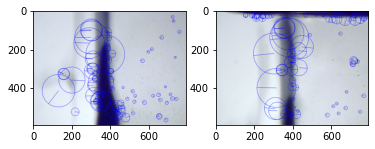

In [22]:
blur1 = cv2.bilateralFilter(s.images[-2],9,75,75)
blur2 = cv2.bilateralFilter(s.images[-1],9,75,75)
# im1 = cv2.Canny(blur1, 20, 100)
# im2 = cv2.Canny(blur2, 20, 100)
H = s.matcher.match(blur1, blur2, defaultToLastH=False, debug=True)
H